In [75]:
import sys
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [85]:
#Define instruments to download 
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Navistar':'NAV',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electric':'GE',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Mitsubishi':'MSBHY',
    'Sony':'SNY',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC',
}

companies = sorted(companies_dict.items(),key = lambda x: x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electric', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Mitsubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNY'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [86]:
#define online source
data_source = 'yahoo'
#define start and end dates
start_date = '2017-01-01'
end_date = '2019-01-01'
#Use pandas_datareader.data.DataReader to Load desired stock data
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

#Print Axes label
print(panel_data.axes)

[DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None), MultiIndex([('Adj Close',  'AMZN'),
            ('Adj Close',  'AAPL'),
            ('Adj Close',   'WBA'),
            ('Adj Close',   'NOC'),
            ('Adj Close',    'BA'),
            ('Adj Close',   'LMT'),
            ('Adj Close',   'MCD'),
            ('Adj Close',  'INTC'),
            ('Adj Close',   'NAV'),
            ('Adj Close',   'IBM'),
            ...
            (   'Volume',   'JNJ'),
            (   'Volume',    'TM'),
            (   'Volume',   'HMC'),
            (   'Volume', 'MSBHY'),
            ( 

In [87]:
#Find stock open data and close data values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])


Symbols
AMZN     753.669983
AAPL     116.150002
WBA       82.959999
NOC      234.889999
BA       156.970001
LMT      253.309998
MCD      119.620003
INTC      36.599998
NAV       31.840000
IBM      167.190002
TXN       73.580002
MA       105.389999
MSFT      62.580002
GE        30.471153
PEP      104.650002
KO        41.799999
JNJ      115.839996
TM       118.550003
HMC       29.610001
MSBHY     42.669998
SNY       41.020000
XOM       90.889999
CVX      117.849998
VLO       70.419998
F         12.590000
BAC       22.530001
Name: 2017-01-03 00:00:00, dtype: float64


In [88]:
#Calculate Daily Stock Movements
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row,col = stock_close.shape

print(row)
print(col)

movements = np.zeros([row, col])

for i in range(0, row):
     movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])
    


26
502


In [89]:
for i in range(0, len(companies)):
     print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: -616.2402954101562
Company: Amazon, Change: 12.089981079101562
Company: Boeing, Change: -11.829998016357422
Company: Bank of America, Change: -63.08050537109375
Company: Chevron, Change: 6.760162353515625
Company: Ford, Change: -103.93986511230469
Company: General Electric, Change: 9.919944763183594
Company: Honda, Change: 1.0100440979003906
Company: IBM, Change: -33.259952545166016
Company: Intel, Change: -60.99986267089844
Company: Johnson & Johnson, Change: 9.060043334960938
Company: Coca Cola, Change: 9.209991455078125
Company: Lockheed Martin, Change: -14.720012664794922
Company: MasterCard, Change: -21.663456916809082
Company: McDonalds, Change: 7.080047607421875
Company: Mitsubishi, Change: 5.6599884033203125
Company: Microsoft, Change: 13.929946899414062
Company: Navistar, Change: -25.289901733398438
Company: Northrop Grumman, Change: -8.289995193481445
Company: Pepsi, Change: -0.05995941162109375
Company: Sony, Change: -11.189979553222656
Company: Toyot

In [90]:
movements.shape

(26, 502)

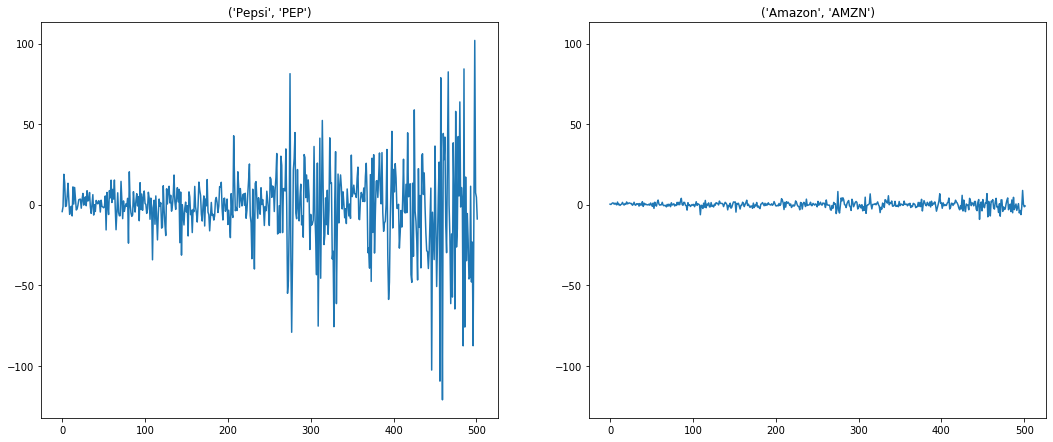

In [91]:
#Visualization - Plot stock movements
plt.clf
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[19])

plt.subplot(222,sharey = ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [92]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.30479870737531944
-0.39516464170116167
-0.0015890311788067995


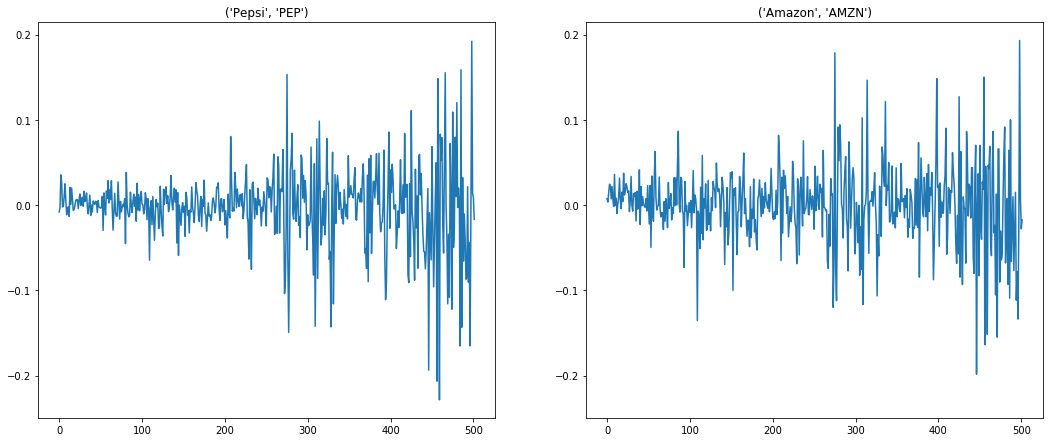

In [93]:
plt.clf
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[19])

plt.subplot(222,sharey = ax1)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

In [121]:
#Import necessary libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

#Define a normalizer 
normalizer = Normalizer()

#Create a KMeans - 10 Clusters
kmeans = KMeans(n_clusters = 10,max_iter = 1000)

#Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

In [122]:
#Fir pipeline to daily stock movements
pipeline.fit(movements)



Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [123]:
print(kmeans.inertia_)

6.874031546023886


In [124]:
import pandas as pd

#predict cluster labels 
labels = pipeline.predict(movements)
#Create a dataframe aligning all labels and companies
df = pd.DataFrame({'labels':labels, 'companies': companies})
#Display df sorted by cluster label 
print(df.sort_values('labels'))

    labels                 companies
19       0              (Pepsi, PEP)
0        1             (Apple, AAPL)
11       1           (Coca Cola, KO)
10       1  (Johnson & Johnson, JNJ)
7        1              (Honda, HMC)
12       1    (Lockheed Martin, LMT)
1        1            (Amazon, AMZN)
23       2      (Valero Energy, VLO)
22       2  (Texas Instruments, TXN)
21       2              (Toyota, TM)
15       3       (Mitsubishi, MSBHY)
14       3          (McDonalds, MCD)
4        4            (Chevron, CVX)
3        4    (Bank of America, BAC)
5        4                 (Ford, F)
20       5               (Sony, SNY)
18       5   (Northrop Grumman, NOC)
25       5              (Exxon, XOM)
24       5           (Walgreen, WBA)
2        5              (Boeing, BA)
9        5             (Intel, INTC)
17       5           (Navistar, NAV)
13       6          (MasterCard, MA)
6        7    (General Electric, GE)
8        8                (IBM, IBM)
16       9         (Microsoft, MSFT)


In [125]:
from sklearn.decomposition import PCA
#visualize the results on PCA reduced data
reduced_data = PCA(n_components = 2).fit_transform(new)
#run kmeans on the reduced data
kmeans = KMeans(n_clusters = 10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

#Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels':labels,'companies':companies})

print(df.sort_values('labels'))

    labels                 companies
23       0      (Valero Energy, VLO)
18       0   (Northrop Grumman, NOC)
17       0           (Navistar, NAV)
16       1         (Microsoft, MSFT)
6        1    (General Electric, GE)
0        2             (Apple, AAPL)
11       2           (Coca Cola, KO)
12       2    (Lockheed Martin, LMT)
1        2            (Amazon, AMZN)
9        3             (Intel, INTC)
20       3               (Sony, SNY)
2        3              (Boeing, BA)
19       3              (Pepsi, PEP)
22       4  (Texas Instruments, TXN)
21       4              (Toyota, TM)
5        5                 (Ford, F)
3        5    (Bank of America, BAC)
24       6           (Walgreen, WBA)
13       6          (MasterCard, MA)
8        7                (IBM, IBM)
25       7              (Exxon, XOM)
15       8       (Mitsubishi, MSBHY)
14       8          (McDonalds, MCD)
10       9  (Johnson & Johnson, JNJ)
7        9              (Honda, HMC)
4        9            (Chevron, CVX)


<Figure size 432x288 with 0 Axes>

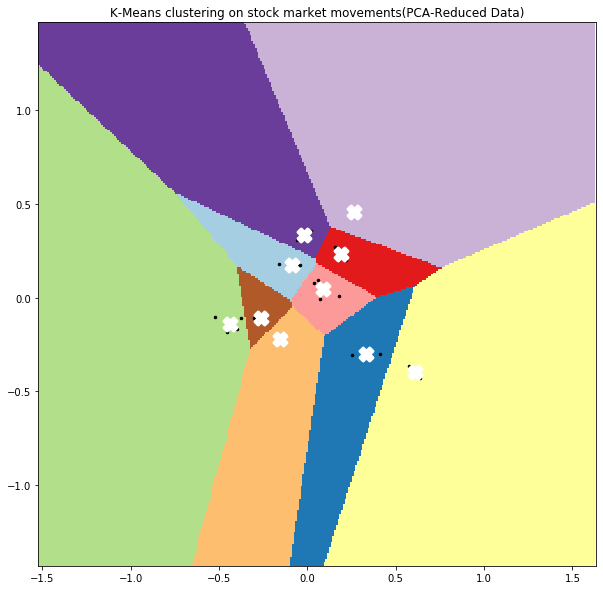

In [127]:
#Define the step size of mesh
h = 0.01

#Plot the decision boundary
x_min, x_max = reduced_data[:,0].min()-1,reduced_data[:,0].max()+1
y_min, y_max = reduced_data[:,1].min()-1,reduced_data[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h)) 

#Obtain labels for each point on the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

#put the result into a color plot
Z = Z.reshape(xx.shape)

#Define colorplot
cmap = plt.cm.Paired

#Plotting the figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation='nearest',
          extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)  

#plot the centroids of each cluster as white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'X',s = 169,linewidths = 3,color = 'w',zorder = 10)

plt.title('K-Means clustering on stock market movements(PCA-Reduced Data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()